In [1]:
# Step 1: import libraries and load the Excel file
import pandas as pd
from sklearn.decomposition import PCA

# Read the completed projects dataset
df = pd.read_excel('completed.xlsx')

# Quick check
print(f"Dataframe shape: {df.shape}")
df.head()


Dataframe shape: (984, 107)


,Identifier,District,PlannedDuration,Budget,EstimatedCost,ActualCost,ActualDuration,D0,D1,D2,...,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99
0,M833,2,108,218503,204306,199884,80,0.050436,0.057051,-0.062343,...,0.144649,0.043740,0.031521,0.035266,0.118762,0.048205,0.065955,-0.040163,0.022939,-0.087531
1,KBOR,17,178,126629,101845,20196,312,0.033444,0.049566,-0.054348,...,0.129817,0.045303,0.032990,0.038753,0.105830,0.048410,0.064996,-0.035301,0.022195,-0.079235
2,KBDA,19,112,56896,56896,31712,126,0.033444,0.049566,-0.054348,...,0.129817,0.045303,0.032990,0.038753,0.105830,0.048410,0.064996,-0.035301,0.022195,-0.079235
3,XAIN,9,121,114030,115828,25423,30,0.041585,0.057959,-0.063683,...,0.153370,0.053890,0.040782,0.042745,0.125479,0.056358,0.076923,-0.042854,0.026099,-0.091771
4,KBUH,21,119,94132,76182,14120,175,0.041744,0.058689,-0.065510,...,0.154061,0.053747,0.040841,0.042473,0.126037,0.057347,0.078114,-0.041267,0.025708,-0.093366


In [2]:
# Step 2: extract the description columns D0–D99
desc_cols = [f'D{i}' for i in range(100)]
X_desc = df[desc_cols].values

print(f"Description matrix shape: {X_desc.shape}")


Description matrix shape: (984, 100)


In [3]:
# Step 3: create PCA transformer and fit it
n_components = 10   # you can adjust this number
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_desc)

# Print how much variance these components explain
explained = pca.explained_variance_ratio_.sum()
print(f"Explained variance by {n_components} PCs: {explained:.2%}")


Explained variance by 10 PCs: 99.73%


In [4]:
# Step 4: look at the PCA loadings (optional)
loadings = pd.DataFrame(pca.components_, 
                        columns=desc_cols, 
                        index=[f'PC{i+1}' for i in range(n_components)])
loadings.head()


,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99
PC1,0.053785,0.069652,-0.079127,-0.085632,0.090850,-0.219250,0.050374,0.297056,-0.058586,-0.145937,...,0.182016,0.067129,0.052276,0.045122,0.153905,0.067990,0.091031,-0.048620,0.034149,-0.103890
PC2,0.147757,-0.133908,-0.023735,-0.019225,-0.059126,0.035229,-0.083425,-0.077677,0.080829,0.057080,...,0.124512,-0.069592,-0.071823,0.158057,-0.205707,-0.203535,-0.049684,0.209395,0.030153,0.063076
PC3,0.016716,-0.061072,0.053909,0.122385,-0.010745,0.076601,0.084773,0.028318,-0.160425,0.021555,...,-0.070728,-0.083796,0.017110,-0.023753,0.179610,-0.010946,0.125628,-0.027989,-0.040970,0.027286
PC4,-0.047784,0.110198,0.006113,0.283915,-0.055791,0.005469,0.048898,0.131405,0.027806,0.019371,...,-0.101866,0.140548,0.073387,0.099511,0.089787,-0.040482,-0.187719,0.269213,0.036506,0.245618
PC5,-0.125323,0.104382,0.096520,0.142693,-0.115465,-0.133391,0.074369,-0.035023,-0.111562,-0.144528,...,0.030052,-0.132234,-0.120190,-0.156317,-0.002436,-0.043071,0.025903,-0.020034,0.181423,0.069591


In [5]:
# Step 5: add the reduced components back into df
for i in range(n_components):
    df[f'PC{i+1}'] = X_pca[:, i]

# Drop the original D0–D99 if you like
df_reduced = df.drop(columns=desc_cols)

# Verify
print(f"Reduced dataframe shape: {df_reduced.shape}")
df_reduced.head()


Reduced dataframe shape: (984, 17)


,Identifier,District,PlannedDuration,Budget,EstimatedCost,ActualCost,ActualDuration,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,M833,2,108,218503,204306,199884,80,0.020865,0.000982,-0.009165,-0.005856,0.008544,0.006960,0.002843,0.009124,0.009011,-0.003150
1,KBOR,17,178,126629,101845,20196,312,-0.048117,0.005516,-0.010747,-0.003127,-0.005069,0.004952,0.001743,0.003216,0.006460,0.001173
2,KBDA,19,112,56896,56896,31712,126,-0.048117,0.005516,-0.010747,-0.003127,-0.005069,0.004952,0.001743,0.003216,0.006460,0.001173
3,XAIN,9,121,114030,115828,25423,30,0.078457,0.005546,-0.007362,-0.003406,-0.006650,0.002705,0.001479,0.003522,0.004881,0.001367
4,KBUH,21,119,94132,76182,14120,175,0.082692,0.005238,-0.008184,-0.002292,-0.006229,0.004356,0.002725,0.004813,0.005182,0.000071


In [6]:
# Step 6: write your new, compact dataset to disk
df_reduced.to_csv('completed_reduced.csv', index=False)
print("Saved reduced dataset to completed_reduced.csv")


Saved reduced dataset to completed_reduced.csv


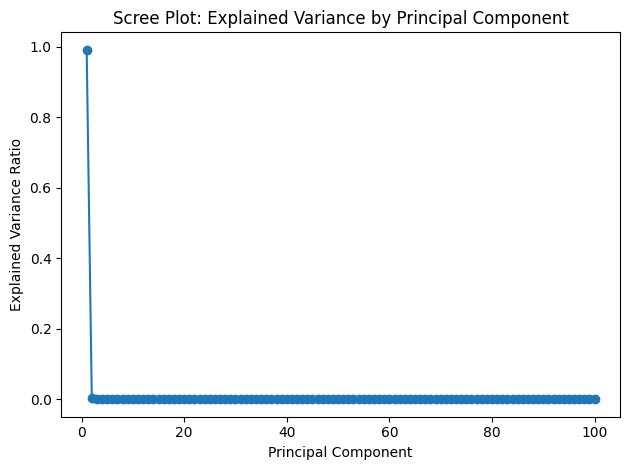

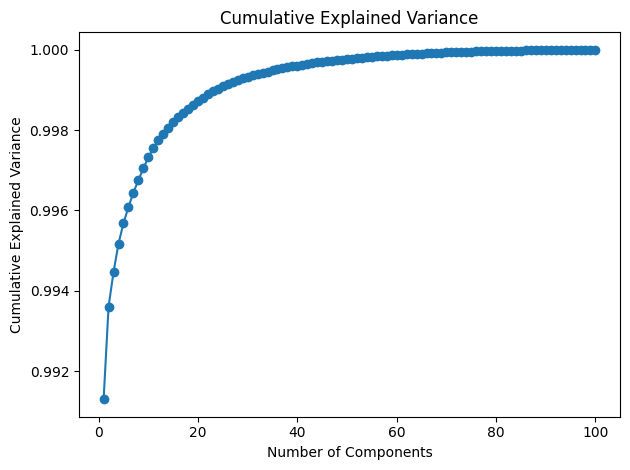

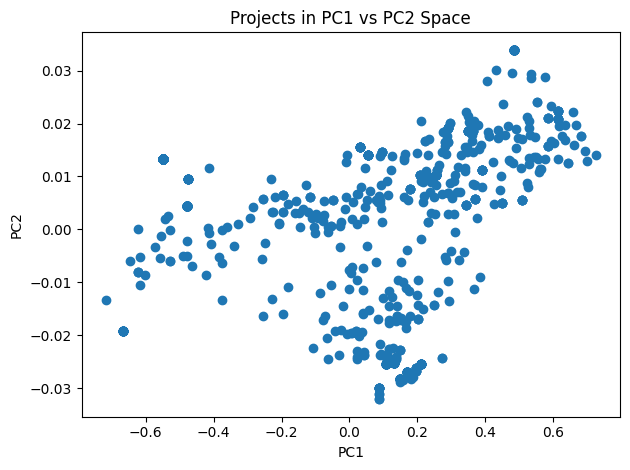

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load data and fit PCA (recreating context)
df = pd.read_excel('completed.xlsx')
desc_cols = [f'D{i}' for i in range(100)]
X_desc = df[desc_cols].values

pca = PCA(n_components=100, random_state=42)
pca.fit(X_desc)
X_pca = pca.transform(X_desc)

# Step 2: Scree plot of explained variance ratio
plt.figure()
plt.plot(range(1, 101), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

# Step 3: Cumulative explained variance
cumulative = pca.explained_variance_ratio_.cumsum()
plt.figure()
plt.plot(range(1, 101), cumulative, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# Step 4: Scatter plot of the first two PCs
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Projects in PC1 vs PC2 Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


In [8]:
#-------------------------------------------standardize PCA


In [9]:
# Cell 1: import libraries and load data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read your Excel file
df = pd.read_excel('completed.xlsx')

# Identify the description columns
desc_cols = [f'D{i}' for i in range(100)]

print(f"Loaded {df.shape[0]} projects with {len(desc_cols)} description dimensions.")


Loaded 984 projects with 100 description dimensions.


In [10]:
# Cell 2: standardize the D-columns to zero mean & unit variance
scaler = StandardScaler()
X_desc = df[desc_cols].values  # 985×100 raw embeddings
X_scaled = scaler.fit_transform(X_desc)

# Quick sanity-check
print("Means after scaling (first 5):", X_scaled.mean(axis=0)[:5])
print("Stds  after scaling (first 5):", X_scaled.std(axis=0)[:5])


Means after scaling (first 5): [ 0.00000000e+00  5.77677021e-17 -5.77677021e-17 -7.22096276e-17
 -1.44419255e-17]
Stds  after scaling (first 5): [1. 1. 1. 1. 1.]


In [11]:
# Cell 3: fit PCA on the scaled data
pca = PCA(random_state=42)  
pca.fit(X_scaled)

# Decide on number of components to retain 95% variance
cumvar = pca.explained_variance_ratio_.cumsum()
n_comp_95 = (cumvar < 0.95).sum() + 1
print(f"Components needed for ≥95% variance: {n_comp_95}")


Components needed for ≥95% variance: 4


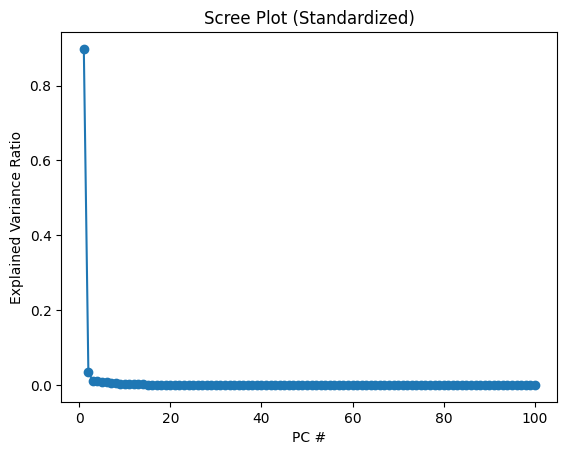

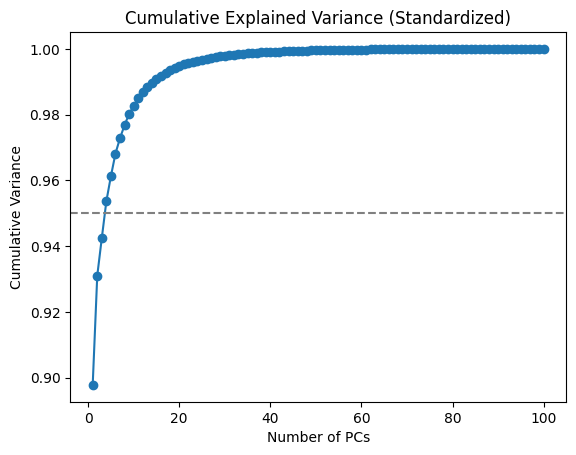

In [12]:
# Cell 4: plot scree and cumulative-variance to visualize
import matplotlib.pyplot as plt

# Scree plot
plt.figure()
plt.plot(range(1, 101), pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot (Standardized)')
plt.xlabel('PC #')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained-variance
plt.figure()
plt.plot(range(1, 101), cumvar, 'o-')
plt.axhline(0.95, color='grey', linestyle='--')
plt.title('Cumulative Explained Variance (Standardized)')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance')
plt.show()


In [13]:
# Cell 5: transform and append the selected PCs back to your DataFrame
X_pca = pca.transform(X_scaled)[:, :n_comp_95]

for i in range(n_comp_95):
    df[f'PC{i+1}'] = X_pca[:, i]

# Drop the original D-columns if you like
df_reduced = df.drop(columns=desc_cols)
print(f"Reduced DataFrame shape: {df_reduced.shape}")


Reduced DataFrame shape: (984, 11)


In [14]:
# Cell 6: save your new, compact dataset
df_reduced.to_csv('completed_pca95.csv', index=False)
print("Saved PCA-reduced (95%) dataset to completed_pca95.csv")


Saved PCA-reduced (95%) dataset to completed_pca95.csv


In [15]:
#-------------------------inprogress

In [16]:
# Step 1: import libraries and load the Excel file
import pandas as pd
from sklearn.decomposition import PCA

# Read the completed projects dataset
df = pd.read_excel('inprogress.xlsx')

# Quick check
print(f"Dataframe shape: {df.shape}")
df.head()

Dataframe shape: (201, 106)


,Identifier,District,PlannedDuration,Budget,EstimatedCost,ActualCost,D0,D1,D2,D3,...,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99
0,KBDD,23,154,60930,3995,3995,0.033444,0.049566,-0.054348,-0.068149,...,0.129817,0.045303,0.032990,0.038753,0.105830,0.048410,0.064996,-0.035301,0.022195,-0.079235
1,KAYT,23,120,64283,41240,36872,0.032843,0.046622,-0.050911,-0.062195,...,0.120617,0.041054,0.030640,0.035822,0.097179,0.045249,0.061022,-0.035731,0.023106,-0.073770
2,K411,21,190,52748,49376,8364,0.016042,0.023530,-0.030062,-0.028772,...,0.070219,0.027307,0.020681,0.019327,0.056696,0.030727,0.039408,-0.015225,0.013828,-0.042633
3,Q090,27,152,102190,146069,145944,0.084590,0.089558,-0.115358,-0.135212,...,0.262300,0.088379,0.071732,0.070698,0.211765,0.088558,0.136844,-0.076435,0.046539,-0.161303
4,X655,7,169,188750,284485,246758,0.054449,0.064690,-0.077344,-0.088015,...,0.181595,0.057437,0.051788,0.049962,0.149258,0.062795,0.093008,-0.051673,0.037770,-0.106587


In [17]:
# Step 2: extract the description columns D0–D99
desc_cols = [f'D{i}' for i in range(100)]
X_desc = df[desc_cols].values

print(f"Description matrix shape: {X_desc.shape}")


Description matrix shape: (201, 100)


In [18]:
# Step 3: create PCA transformer and fit it
n_components = 10   # you can adjust this number
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_desc)

# Print how much variance these components explain
explained = pca.explained_variance_ratio_.sum()
print(f"Explained variance by {n_components} PCs: {explained:.2%}")


Explained variance by 10 PCs: 99.77%


In [19]:
# Step 4: look at the PCA loadings (optional)
loadings = pd.DataFrame(pca.components_, 
                        columns=desc_cols, 
                        index=[f'PC{i+1}' for i in range(n_components)])
loadings.head()


,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99
PC1,0.053373,0.070141,-0.078877,-0.085322,0.089861,-0.219696,0.050477,0.296766,-0.058297,-0.146589,...,0.182040,0.067106,0.051321,0.044976,0.153515,0.068337,0.090192,-0.048274,0.034428,-0.103435
PC2,0.137287,-0.119888,-0.023436,-0.005571,-0.069214,0.023120,-0.083871,-0.063346,0.091080,0.049425,...,0.116030,-0.066254,-0.069368,0.160141,-0.204149,-0.207812,-0.064566,0.232242,0.029752,0.081678
PC3,0.006680,-0.074423,0.043318,0.090942,-0.036390,0.081549,0.077854,0.019265,-0.185627,0.040465,...,-0.067290,-0.098231,-0.009425,-0.052385,0.172395,-0.014906,0.128883,-0.032931,-0.042814,0.040275
PC4,-0.044501,0.079574,-0.015638,0.269127,-0.037945,0.032443,0.054176,0.145102,0.003199,0.036226,...,-0.111781,0.173799,0.094260,0.093267,0.134472,-0.026941,-0.169125,0.248550,0.024084,0.244553
PC5,-0.081611,0.151861,0.074557,0.156243,-0.133541,-0.099823,0.082952,-0.056764,-0.139890,-0.096005,...,-0.004684,-0.075869,-0.107567,-0.144163,0.002105,-0.073896,0.029917,0.003722,0.266525,0.079609


In [20]:
# Step 5: add the reduced components back into df
for i in range(n_components):
    df[f'PC{i+1}'] = X_pca[:, i]

# Drop the original D0–D99 if you like
df_reduced = df.drop(columns=desc_cols)

# Verify
print(f"Reduced dataframe shape: {df_reduced.shape}")
df_reduced.head()


Reduced dataframe shape: (201, 16)


,Identifier,District,PlannedDuration,Budget,EstimatedCost,ActualCost,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,KBDD,23,154,60930,3995,3995,-0.035647,0.004159,-0.010007,-0.005148,-0.005266,0.001216,-0.005053,0.000244,0.006494,0.000963
1,KAYT,23,120,64283,41240,36872,-0.084673,0.001417,-0.010526,-0.006716,-0.003004,-0.000969,-0.001785,-0.002408,0.008006,0.002288
2,K411,21,190,52748,49376,8364,-0.356329,0.000857,-0.011601,0.000699,0.006625,-0.000552,-0.001007,-0.001131,0.002477,0.003696
3,Q090,27,152,102190,146069,145944,0.694381,0.014791,0.006565,-0.019726,-0.014804,-0.009931,0.006746,0.004660,0.001093,0.005729
4,X655,7,169,188750,284485,246758,0.239285,0.010272,-0.001570,-0.013472,-0.001835,-0.009181,0.000751,0.005932,0.005726,0.002639


In [21]:
# Step 6: write your new, compact dataset to disk
df_reduced.to_csv('inprogress_reduced.csv', index=False)
print("Saved reduced dataset to completed_reduced.csv")


Saved reduced dataset to completed_reduced.csv


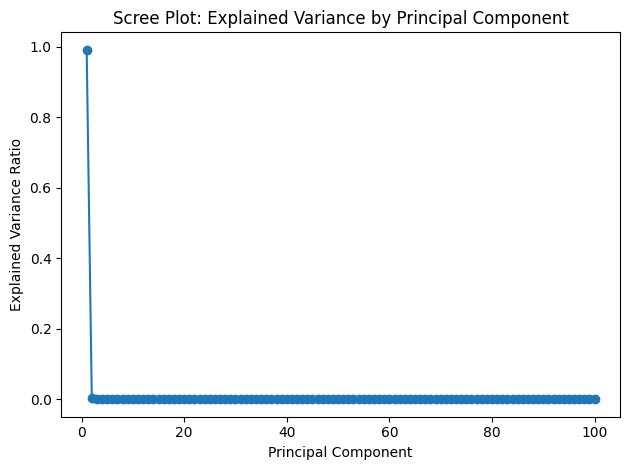

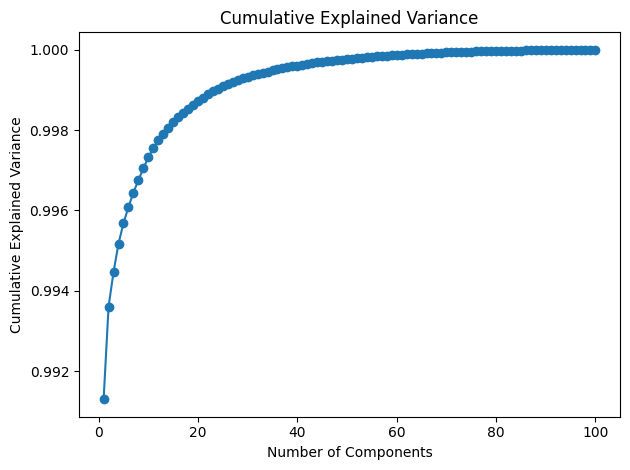

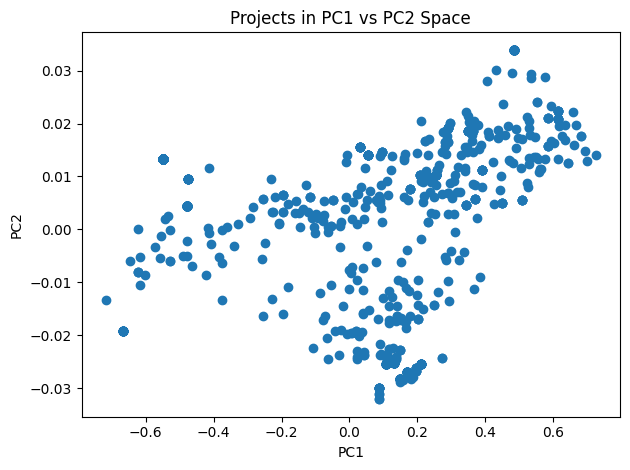

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load data and fit PCA (recreating context)
df = pd.read_excel('completed.xlsx')
desc_cols = [f'D{i}' for i in range(100)]
X_desc = df[desc_cols].values

pca = PCA(n_components=100, random_state=42)
pca.fit(X_desc)
X_pca = pca.transform(X_desc)

# Step 2: Scree plot of explained variance ratio
plt.figure()
plt.plot(range(1, 101), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

# Step 3: Cumulative explained variance
cumulative = pca.explained_variance_ratio_.cumsum()
plt.figure()
plt.plot(range(1, 101), cumulative, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# Step 4: Scatter plot of the first two PCs
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Projects in PC1 vs PC2 Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


In [23]:
#-------------------------------------------standardize PCA for inprogress


In [24]:
# Cell 1: import libraries and load data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read your Excel file
df = pd.read_excel('inprogress.xlsx')

# Identify the description columns
desc_cols = [f'D{i}' for i in range(100)]

print(f"Loaded {df.shape[0]} projects with {len(desc_cols)} description dimensions.")


Loaded 201 projects with 100 description dimensions.


In [25]:
# Cell 2: standardize the D-columns to zero mean & unit variance
scaler = StandardScaler()
X_desc = df[desc_cols].values  # 985×100 raw embeddings
X_scaled = scaler.fit_transform(X_desc)

# Quick sanity-check
print("Means after scaling (first 5):", X_scaled.mean(axis=0)[:5])
print("Stds  after scaling (first 5):", X_scaled.std(axis=0)[:5])


Means after scaling (first 5): [-1.59076732e-16  1.14888751e-16  7.07007697e-17 -4.41879811e-17
  2.38615098e-16]
Stds  after scaling (first 5): [1. 1. 1. 1. 1.]


In [26]:
# Cell 3: fit PCA on the scaled data
pca = PCA(random_state=42)  
pca.fit(X_scaled)

# Decide on number of components to retain 95% variance
cumvar = pca.explained_variance_ratio_.cumsum()
n_comp_95 = (cumvar < 0.95).sum() + 1
print(f"Components needed for ≥95% variance: {n_comp_95}")


Components needed for ≥95% variance: 4


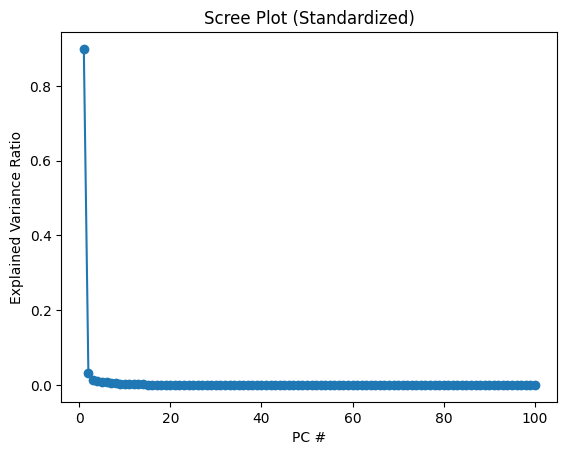

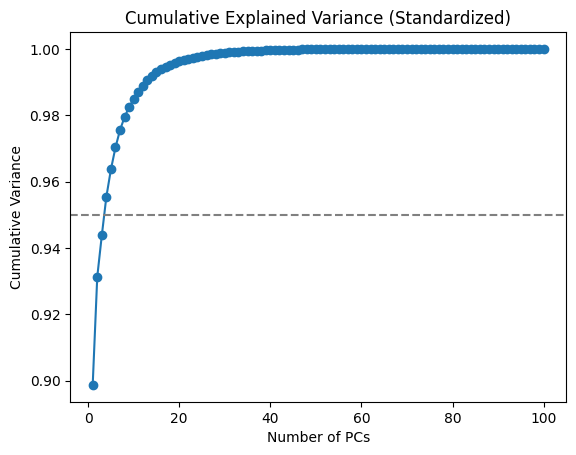

In [27]:
# Cell 4: plot scree and cumulative-variance to visualize
import matplotlib.pyplot as plt

# Scree plot
plt.figure()
plt.plot(range(1, 101), pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot (Standardized)')
plt.xlabel('PC #')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained-variance
plt.figure()
plt.plot(range(1, 101), cumvar, 'o-')
plt.axhline(0.95, color='grey', linestyle='--')
plt.title('Cumulative Explained Variance (Standardized)')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance')
plt.show()


In [28]:
# Cell 5: transform and append the selected PCs back to your DataFrame
X_pca = pca.transform(X_scaled)[:, :n_comp_95]

for i in range(n_comp_95):
    df[f'PC{i+1}'] = X_pca[:, i]

# Drop the original D-columns if you like
df_reduced = df.drop(columns=desc_cols)
print(f"Reduced DataFrame shape: {df_reduced.shape}")


Reduced DataFrame shape: (201, 10)


In [29]:
# Cell 6: save your new, compact dataset
df_reduced.to_csv('inprogress_pca95.csv', index=False)
print("Saved PCA-reduced (95%) dataset to inprogress_pca95.csv")


Saved PCA-reduced (95%) dataset to inprogress_pca95.csv
